In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt 
import matplotlib
import pandas as pd
# pd.options.plotting.backend = 'plotly'
matplotlib.rcParams['font.family'] ='Malgun Gothic'

In [160]:
from datetime import timedelta
import datetime

diff_days = datetime.date(2021,10,15) - datetime.date(2020,1,19)
date_list = []
for i in range(diff_days.days):
    date_list.append(datetime.date(2020, 1, 19) + timedelta(days=i))
    
date_df = pd.DataFrame({'date' : date_list})

In [161]:
# 데이터 전처리
infection = pd.DataFrame({})#{'서울' : pd.DataFrame({})}
pre_data = pd.DataFrame({})
Monthly_tmp = {}

region_list = ['인천','서울','경기', '전북', '광주', '전남', '대구', '경북', '경남', '충북', '제주', '부산', '세종', '강원', '대전', '울산', '충남']#, '검역소']
for i in range(1): 
    data_1 = pd.read_csv('대한수학회 공유확진자DB_220321_' + str(i+1) + '.csv', low_memory=False)

    data_1 = data_1[['거주시군구', '거주시도', '발병일', '신고일', '연령', '위중증 유무(유:1)', '사망유무(유:1)', '선행확진자_번호']]
    data_1 = data_1.fillna(0)
    data_1['신고일'] = pd.to_datetime(data_1['신고일'], format="%Y-%m-%d")
    data_1['신고일'] = data_1['신고일'][data_1['신고일'] >= pd.to_datetime('2020-01-19', format="%Y-%m-%d")]
    data_1['신고일'] = data_1['신고일'][data_1['신고일'] <= pd.to_datetime('2021-10-15', format="%Y-%m-%d")]
    
    data_1['확진자'] = [1]*len(data_1)
    # data_1['위중증또는사망'] = [0]*len(data_1)
    # data_1['위중증또는사망'][(data_1['위중증 유무(유:1)']==1) | (data_1['사망유무(유:1)']==1)] = 1

    data_1 = data_1[data_1['거주시도'] != 0] 
    # region_list = list(Counter(data_1['거주시도']).keys())
    region_group = dict(list(data_1.groupby(data_1['거주시도'])))
    
    total_df = pd.DataFrame({})
    for j in range(len(region_list)):
        region_group[region_list[j]]['신고일'] = region_group[region_list[j]]['신고일'].apply(lambda x: x.date())
        test_df = pd.concat([region_group[region_list[j]], date_df], ignore_index=True)
        test_df = test_df.sort_values(by='신고일')
        # test_df['time_idx'] = [i for i in range(len(test_df))]
        test_df['거주시도'] = region_list[j]
        test_df = test_df.fillna(0)
        
        pre_df = pd.DataFrame({})
        tmp_df = pd.DataFrame({})
        
        tmp_df['date'] = region_group[region_list[j]]['신고일']
        # tmp_df['date'] = tmp_df['date'].apply(lambda x: x.date())

        pre_df['date'] = tmp_df['date'].value_counts().index
        pre_df['value'] = tmp_df['date'].value_counts().values

        pre_df = pd.merge(pre_df,date_df,how='outer') # date 없는 값을 NaN으로 채워서 합치기 https://mindscale.kr/course/pandas-basic/merge/
        pre_df = pre_df.sort_values(by='date') # date 기준으로 sort
        pre_df = pre_df.fillna(0) # 빈 값 0으로 채우기
        pre_df['time_idx'] = [i for i in range(len(pre_df))]
        pre_df['value'] = pre_df['value'].astype(int)
        # 지역 번호
        pre_df['region_idx'] = j
        
        total_df = pd.concat([total_df, pre_df])
        total_df.index = [i for i in range(len(total_df))] # merge하면서 뒤죽박죽인 index를 다시 0부터
        # pre_df['unlinked_ratio'] = []
        # pre_df['asym_ratio'] = []


c:\Users\bm990\Desktop\백업\Python_Code\Infection_Tree\.venv\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [162]:
total_df.to_csv('deepAR_covid_test.csv')

In [163]:
total_df

,date,value,time_idx,region_idx
0,2020-01-19,1,0,0
1,2020-01-20,0,1,0
2,2020-01-21,0,2,0
3,2020-01-22,0,3,0
4,2020-01-23,0,4,0
...,...,...,...,...
10807,2021-10-11,38,631,16
10808,2021-10-12,41,632,16
10809,2021-10-13,45,633,16
10810,2021-10-14,40,634,16


<AxesSubplot:>

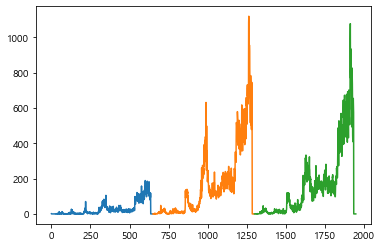

In [155]:
total_df['value'][total_df['region_idx'] == 0].plot()
total_df['value'][total_df['region_idx'] == 1].plot()
total_df['value'][total_df['region_idx'] == 2].plot()

In [159]:
total_df

,date,value,time_idx,region_idx
0,2020-01-19,1,0,0
1,2020-01-20,0,1,0
2,2020-01-21,0,2,0
3,2020-01-22,0,3,0
4,2020-01-23,0,4,0
...,...,...,...,...
11045,2021-10-25,0,645,16
11046,2021-10-26,0,646,16
11047,2021-10-27,0,647,16
11048,2021-10-28,0,648,16


In [157]:
total_df[total_df['value'] == 519]

,date,value,time_idx,region_idx
1280,2021-10-10,519,630,1


In [106]:
pre_df = pd.DataFrame({})
tmp_df = pd.DataFrame({})
tmp_df['date'] = region_group['강원']['신고일']
tmp_df['date'] = tmp_df['date'].apply(lambda x: x.date())

pre_df['date'] = tmp_df['date'].value_counts().index
pre_df['values'] = tmp_df['date'].value_counts().values

pre_df = pd.merge(pre_df,date_df,how='outer') # date 없는 값을 NaN으로 채워서 합치기 https://mindscale.kr/course/pandas-basic/merge/
pre_df = pre_df.sort_values(by='date') # date 기준으로 sort
pre_df = pre_df.fillna(0) # 빈 값 0으로 채우기
pre_df['time_idx'] = [i for i in range(len(pre_df))]
pre_df['values'] = pre_df['values'].astype(int)
# 지역 번호
pre_df['region_idx'] = 1
pre_df.index = [i for i in range(len(pre_df))] # merge하면서 뒤죽박죽인 index를 다시 0부터
# pre_df['unlinked_ratio'] = []
# pre_df['asym_ratio'] = []


In [143]:
pre_df

,date,values,time_idx,region_idx
504,2020-01-19,0,0,16
505,2020-01-20,0,1,16
506,2020-01-21,0,2,16
507,2020-01-22,0,3,16
508,2020-01-23,0,4,16
...,...,...,...,...
645,2021-10-25,0,645,16
646,2021-10-26,0,646,16
647,2021-10-27,0,647,16
648,2021-10-28,0,648,16


In [17]:
# 누적 확진자 계산
for region in region_list:
    
    for idx in infection['인천'].index:
        if idx not in infection[region].index:
            infection[region].loc[idx] = [0, 0, 0, 0, 0]
            
    
    infection[region] = infection[region].reindex(index = infection['인천'].index)    
    infection[region]['누적확진자'] = [0 for _ in range(len(infection['인천']))]
    infection[region]['누적위중증'] = [0 for _ in range(len(infection['인천']))]
    
    prior_cum = 0
    prior_cum_sev = 0
    
    for date in infection['인천'].index: # 전체 인덱스 포함되어있는거 인천으로 임의지정
        if '202001' in date:
            # 누적 확진자 초기값
            infection[region].loc[date, '누적확진자'] = infection[region].loc[date, '확진자']
            prior_cum = infection[region].loc[date, '확진자']
            
            # 누적 위중증, 사망
            infection[region].loc[date, '누적위중증'] = infection[region].loc[date, '위중증또는사망']
            prior_cum_sev = infection[region].loc[date, '위중증또는사망']
            
        else:
            # 누적 확진자
            infection[region].loc[date, '누적확진자'] = infection[region].loc[date, '확진자'] + prior_cum
            prior_cum = infection[region].loc[date, '누적확진자']
            
            # 누적 위중증, 사망
            infection[region].loc[date, '누적위중증'] = infection[region].loc[date, '위중증또는사망'] + prior_cum_sev
            prior_cum_sev = infection[region].loc[date, '누적위중증']
            
    
    infection[region] = infection[region].astype(int)

c:\Users\bm990\Desktop\백업\Python_Code\Infection_Tree\.venv\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


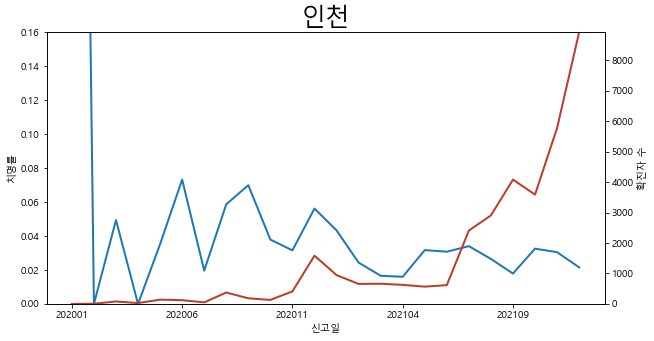

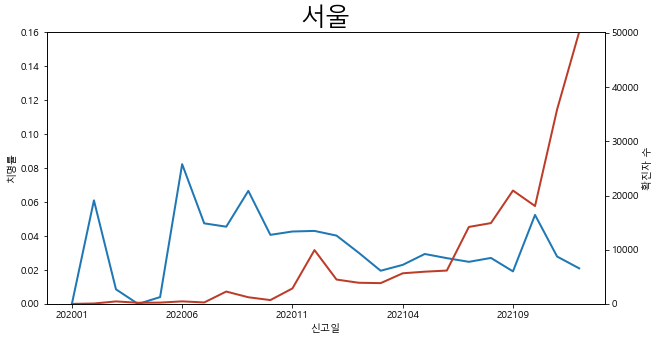

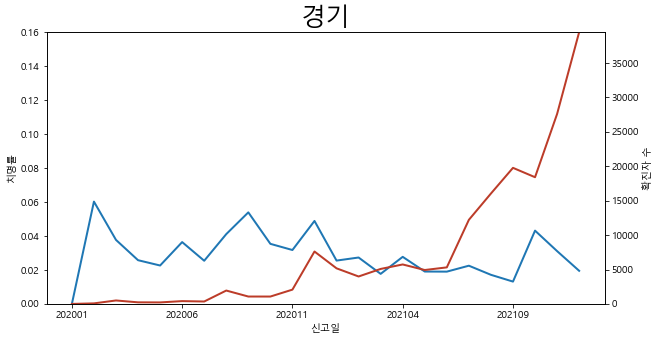

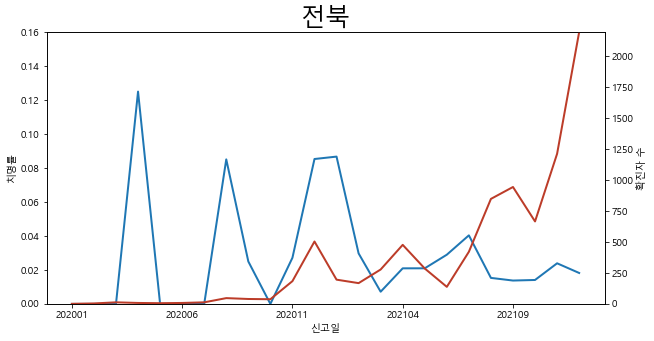

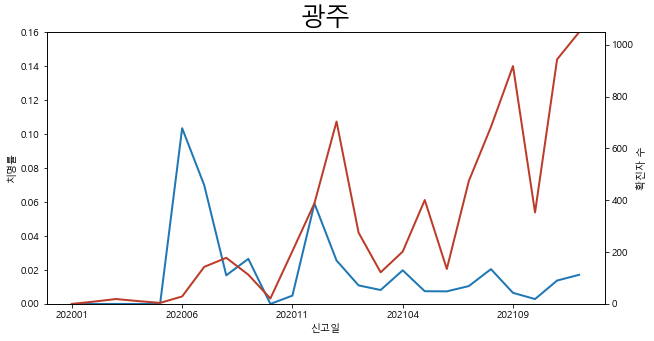

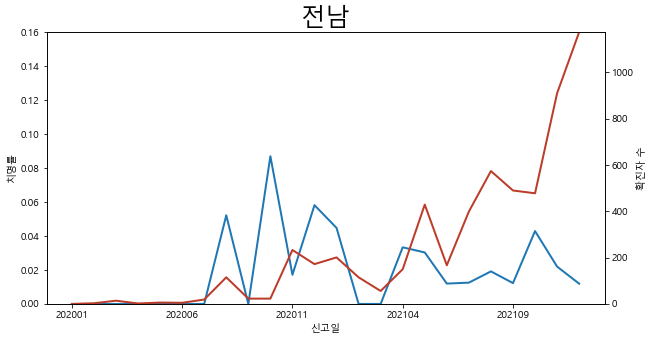

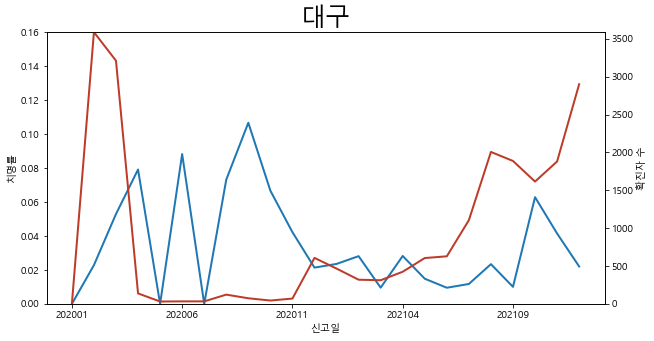

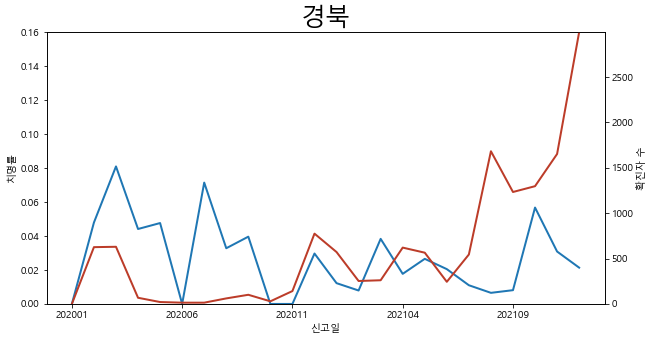

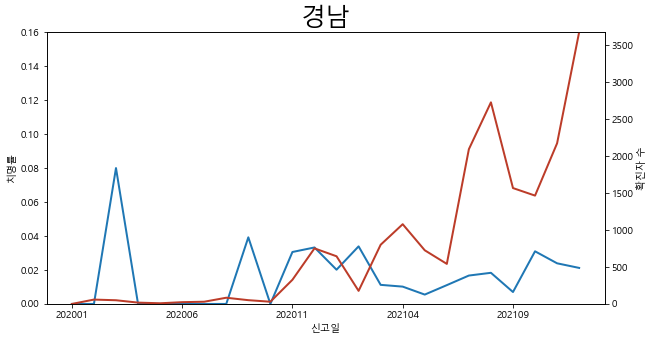

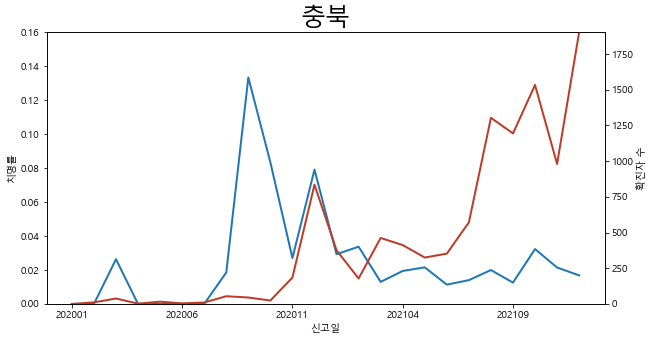

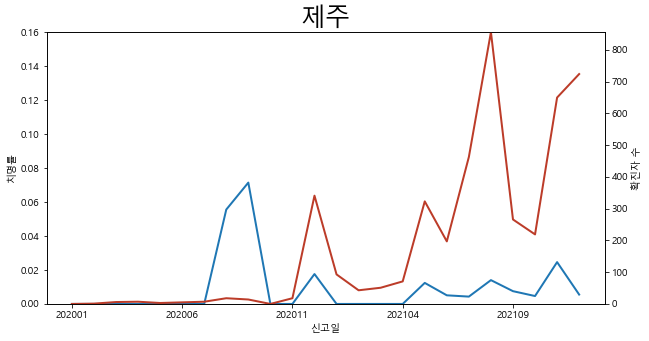

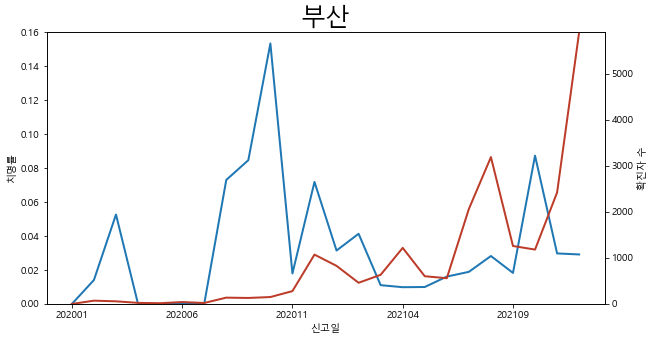

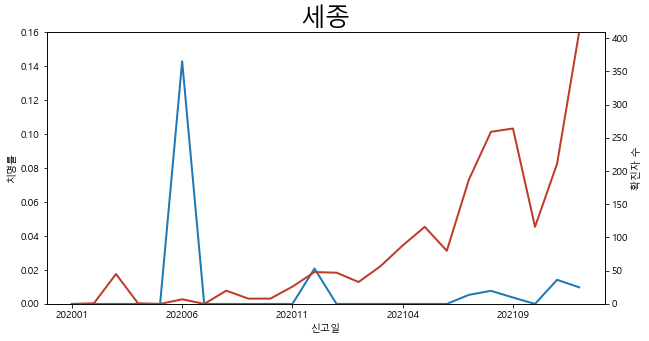

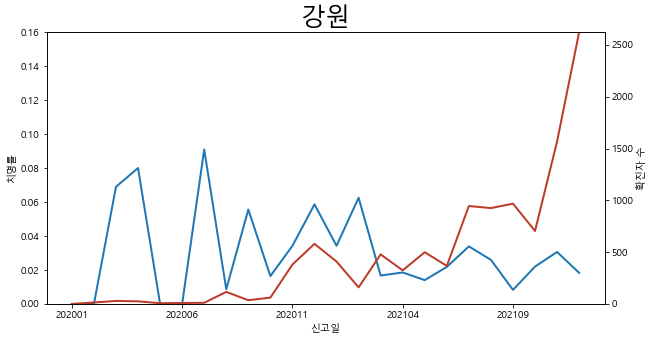

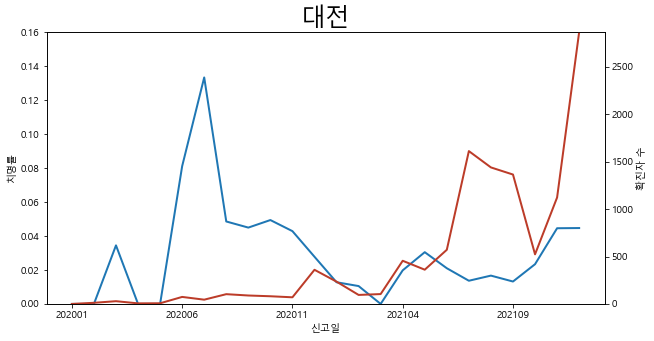

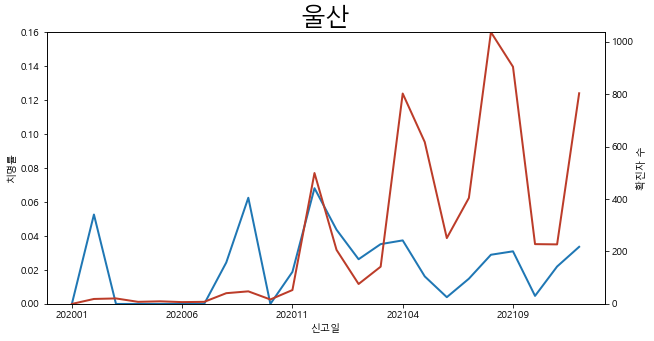

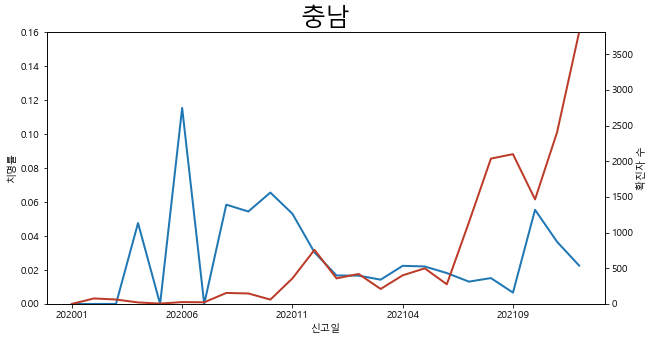

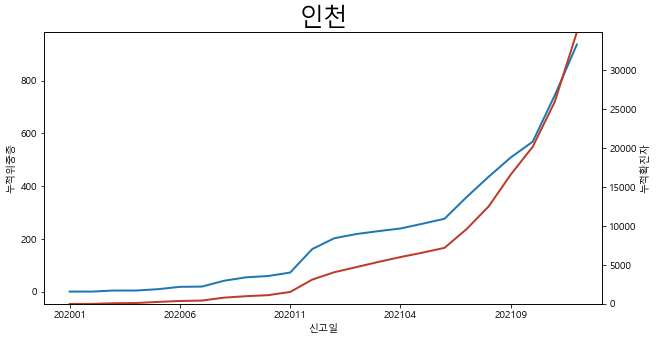

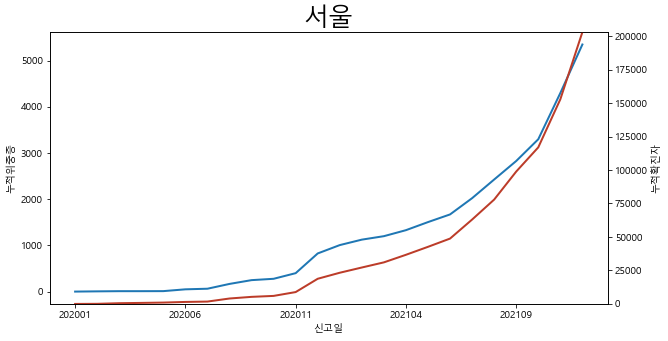

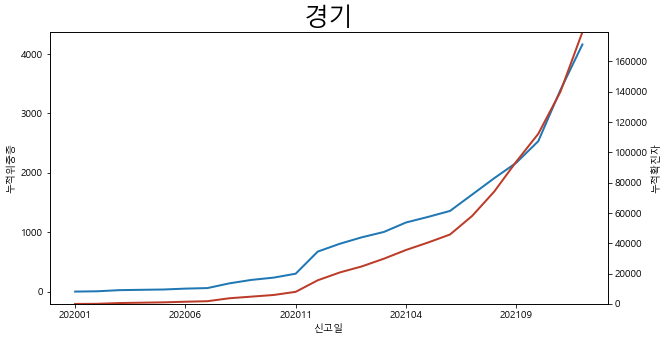

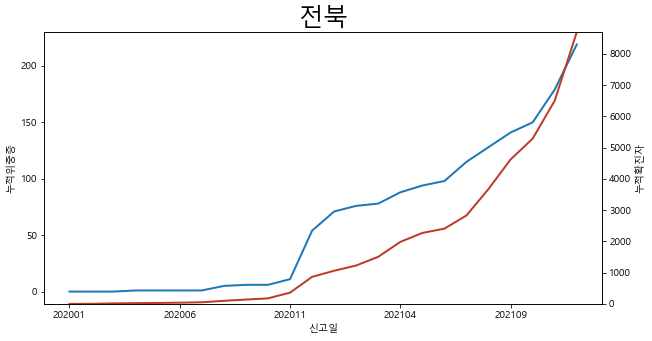

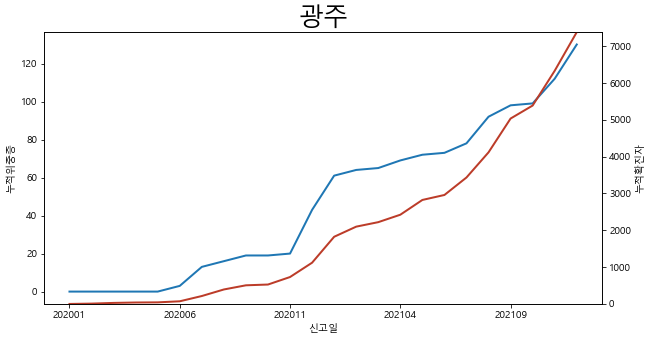

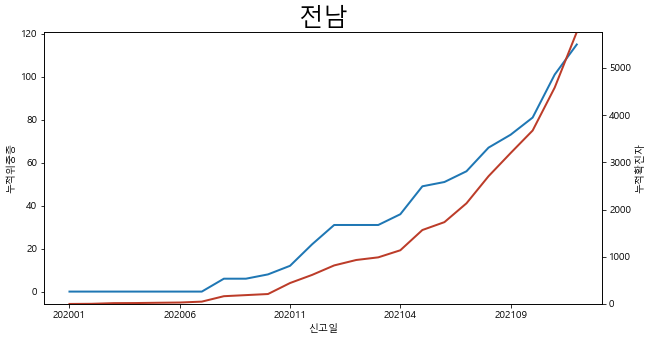

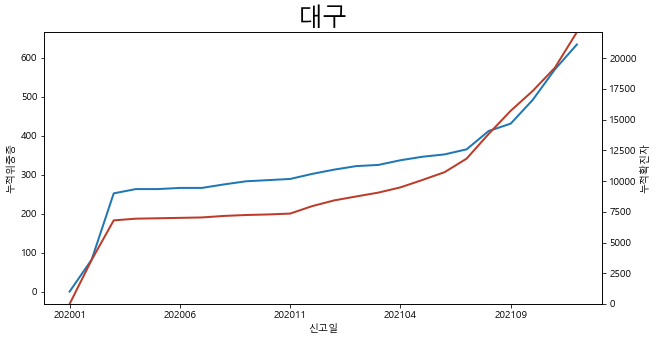

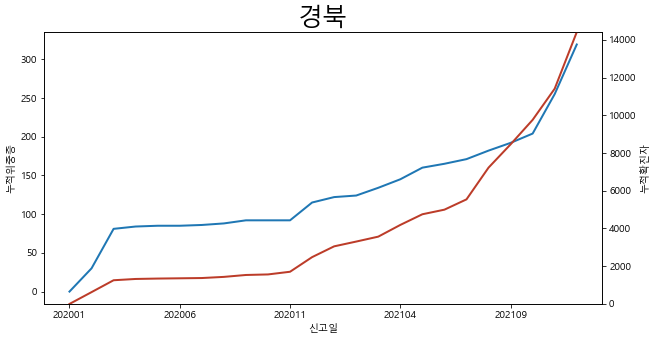

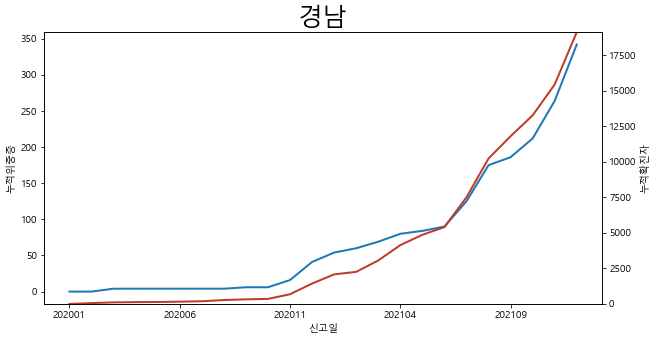

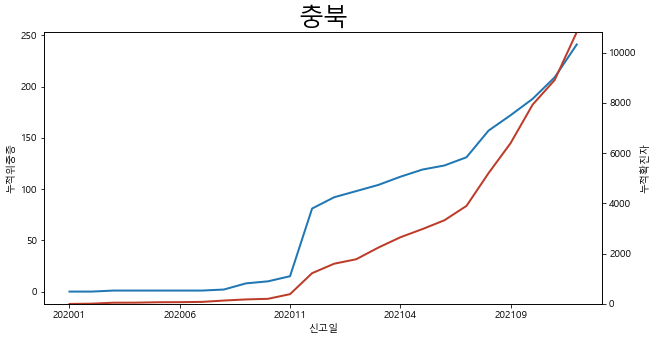

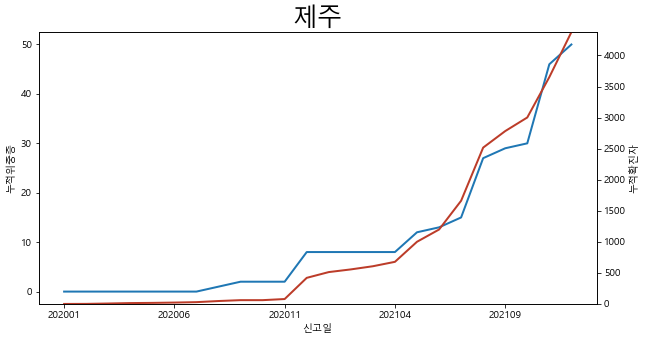

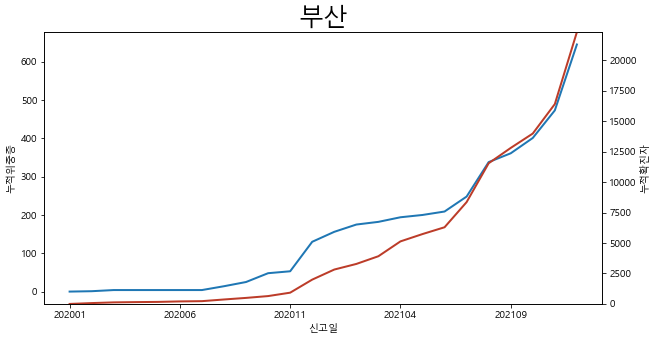

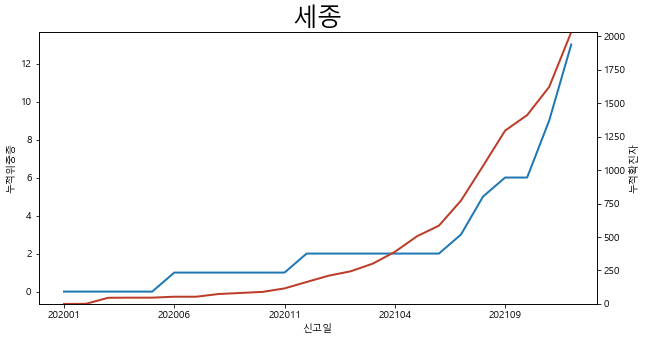

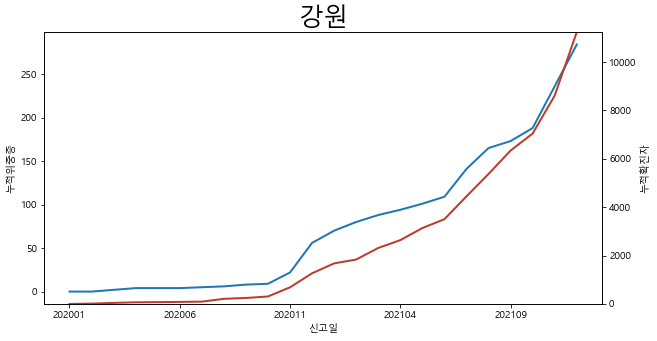

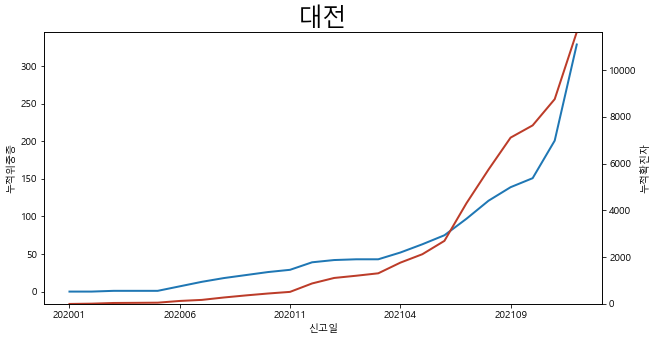

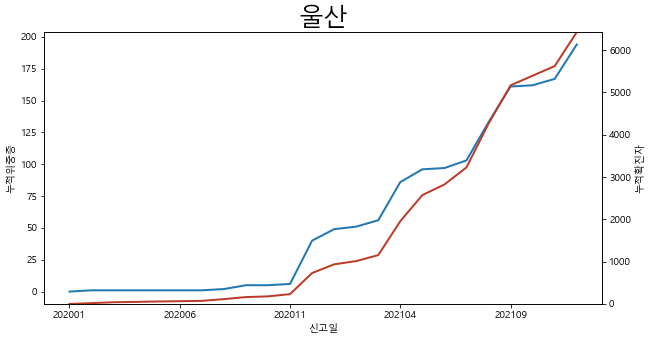

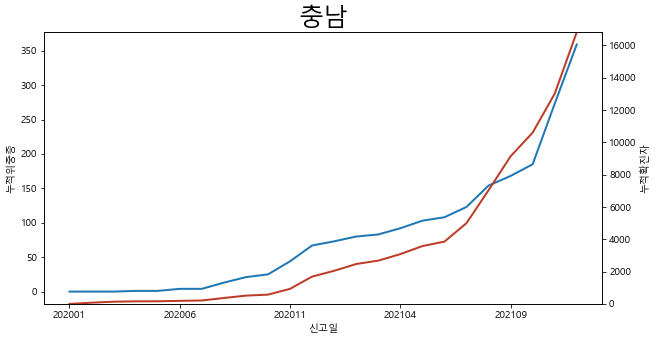

In [4]:
# Daily
for region in region_list:
    fig, ax = plt.subplots(figsize=(10,5))
    # infection[region] = infection[region].drop(['197001'])
    # infection[region][['위중증 유무(유:1)', '사망유무(유:1)']].plot.bar(width=0.8, ax = ax)
    # infection[region]['치명률'].plot.bar(width=0.8, ax = ax)
    infection[region]['치명률'].plot(linewidth=2, ax = ax)
    infection[region]['확진자'].plot(secondary_y=True, color = '#BC3C29FF', linewidth=2, ax = ax)
    
    # ax.set_xticklabels(infection[region].index, rotation=45)
    ax.set_ylim(0, 0.16)
    ax.right_ax.set_ylim(0,max(infection[region]['확진자']))
    ax.set_title(str(region), fontsize=25)
    ax.right_ax.set_ylabel('확진자 수')
    ax.set_ylabel('치명률')
    # ax2 = ax.twinx()
    # ax2.set_ylabel('확진자 수')
    plt.savefig('tosubmit/' + region + '_Monthly.png')
    
# Cum

for region in region_list:
    fig, ax = plt.subplots(figsize=(10,5))
    infection[region]['누적위중증'].plot(linewidth=2, ax = ax)
    infection[region]['누적확진자'].plot(secondary_y=True, color = '#BC3C29FF', linewidth=2, ax = ax)
    
    # ax.set_xticklabels(infection[region].index, rotation=45)
    # ax.set_ylim(0, 0.16)
    ax.right_ax.set_ylim(0,max(infection[region]['누적확진자']))
    ax.set_title(str(region), fontsize=25)
    ax.right_ax.set_ylabel('누적확진자')
    ax.set_ylabel('누적위중증')
    plt.savefig('tosubmit/' + region + '_Monthly_cum.png')

In [9]:
pd.DataFrame(infection['인천'])

,위중증 유무(유:1),사망유무(유:1),확진자,위중증또는사망,치명률,누적확진자,누적위중증
신고일,,,,,,,
202001,1.0,0.0,1.0,1.0,1.000000,1.0,1.0
202002,0.0,0.0,7.0,0.0,0.000000,8.0,1.0
202003,4.0,1.0,81.0,4.0,0.049383,89.0,5.0
202004,0.0,0.0,28.0,0.0,0.000000,117.0,5.0
202005,5.0,0.0,142.0,5.0,0.035211,259.0,10.0
202006,8.0,3.0,123.0,9.0,0.073171,382.0,19.0
202007,1.0,0.0,51.0,1.0,0.019608,433.0,20.0
202008,22.0,4.0,375.0,22.0,0.058667,808.0,42.0
202009,12.0,3.0,186.0,13.0,0.069892,994.0,55.0


In [4]:
import json
# 경위도 json 파일 로드 
geo_path = '__original_json_file_path__'
f = open(geo_path, encoding='ANSI')
geo_json = json.loads(f.read())

sido_list = []

def convert_yx(lon_lat):
    lat_lon = []
    for x,y in lon_lat:
        temp = x
        x = y
        y = temp
        lat_lon.append([x,y])
    return lat_lon
    

for i in range(17):
    lon_lat = sum(geo_json['features'][i]['geometry']['coordinates'], [])

    lat_lon = []
    
    try: # 쪼개지지 않고 하나의 덩어리로 그려지는 도시들 
        sido_list.append(convert_yx(lon_lat))

    except: # 여러개로 쪼개지는 형태의 도시들
        new_sido = []
        sido = sum(geo_json['features'][i]['geometry']['coordinates'], []) 
        for sido_pice in sido: 
            new_pice = []
            new_sido.append(convert_yx(sido_pice)) 
            
        sido_list.append(new_sido)

# geometry에 변환된 경위도 값  넣어주기 
for i in range(17):
    geo_json['features'][i]['geometry']['coordinates'] = sido_list[i]

# 저장 
with open('__save_path__','w', encoding='ANSI') as make_file:
    json.dump(geo_json, make_file, indent="\t")

FileNotFoundError: [Errno 2] No such file or directory: '__original_json_file_path__'

In [ ]:
import folium
import json

m = folium.Map(location=[36, 127],  tiles="Mapbox Bright", zoom_start=7)

path = '__json_file_path__' # 위에서 얻은 json 파일 경로
f = open(path, encoding='ANSI') 
json = json.loads(f.read())


for i in range(17):
    folium.Polygon(
        locations =  json['features'][i]['geometry']['coordinates'], # foligon 사용 예시 
        fill = True,
    ).add_to(m)

m.save('__save_path__.html')     

In [ ]:
infection = {}#{'서울' : pd.DataFrame({})}
Monthly_tmp = {}

region_list = ['인천','서울','경기', '전북', '광주', '전남', '대구', '경북', '경남', '충북', '제주', '부산', '세종', '강원', '대전', '울산', '충남']#, '검역소']
for i in [1,2,3,4,5]: 
    data_1 = pd.read_csv('대한수학회 공유확진자DB_220321_' + str(i+1) + '.csv', low_memory=False)

    data_1 = data_1[['거주시군구', '거주시도', '신고일', '위중증 유무(유:1)', '사망유무(유:1)']]
    data_1 = data_1.fillna(0)
    data_1['신고일'] = pd.to_datetime(data_1['신고일'], format="%Y-%m-%d")
    data_1['신고일'] = data_1['신고일'][data_1['신고일'] >= pd.to_datetime('2021-12-22', format="%Y-%m-%d")]
    data_1['신고일'] = data_1['신고일'][data_1['신고일'] <= pd.to_datetime('2022-02-28', format="%Y-%m-%d")]
    
    data_1['확진자'] = [1]*len(data_1)
    data_1['위중증또는사망'] = [0]*len(data_1)
    data_1['위중증또는사망'][(data_1['위중증 유무(유:1)']==1) | (data_1['사망유무(유:1)']==1)] = 1
    
    data_1 = data_1[data_1['거주시도'] != 0] 
    # region_list = list(Counter(data_1['거주시도']).keys())
    region_group = dict(list(data_1.groupby(data_1['거주시도'])))


    for region in region_list:
        # sum_ = sum(region_group[region]['위중증 유무(유:1)']) + sum(region_group[region]['사망유무(유:1)'])
        sum_ = sum(region_group[region]['위중증또는사망']) # 위중증 또는 사망으로 수정
        inf_ = len(region_group[region])
        Monthly_data = data_1.groupby(data_1['신고일'][data_1['거주시도'] == region].dt.strftime("%Y%m%w")).sum()
        # Monthly_data['치명률'] = (Monthly_data['위중증 유무(유:1)'] + Monthly_data['사망유무(유:1)']) / Monthly_data['확진자']
        Monthly_data['치명률'] = (Monthly_data['위중증또는사망']) / Monthly_data['확진자']

        if i > 2:
            Monthly_data = Monthly_data.add(infection[region], fill_value=0)

        infection[region] = Monthly_data
        # print(infection[region])

In [ ]:
for region in region_list:
    fig, ax = plt.subplots(figsize=(10,5))
    # infection[region] = infection[region].drop(['197001'])
    # infection[region][['위중증 유무(유:1)', '사망유무(유:1)']].plot.bar(width=0.8, ax = ax)
    infection[region]['치명률'].plot.bar(width=0.8, ax = ax)
    
    infection[region]['확진자'].plot(secondary_y=True, color = '#BC3C29FF', linewidth=2, ax = ax)
    ax.right_ax.set_ylim(0,max(infection[region]['확진자']))
    ax.set_title(str(region), fontsize=25)
    ax.set_xticklabels(infection[region].index, rotation=45)
    plt.savefig(region + '_Monthly2.png')

In [ ]:
infection = {}#{'서울' : pd.DataFrame({})}
Monthly_tmp = {}

region_list = ['인천','서울','경기', '전북', '광주', '전남', '대구', '경북', '경남', '충북', '제주', '부산', '세종', '강원', '대전', '울산', '충남']#, '검역소']
for i in range(2): 
    data_1 = pd.read_csv('대한수학회 공유확진자DB_220321_' + str(i+1) + '.csv', low_memory=False)

    data_1 = data_1[['거주시군구', '거주시도', '신고일', '위중증 유무(유:1)', '사망유무(유:1)']]
    data_1 = data_1.fillna(0)
    data_1['신고일'] = pd.to_datetime(data_1['신고일'], format="%Y-%m-%d")
    data_1['신고일'] = data_1['신고일'][data_1['신고일'] >= pd.to_datetime('2020-01-19', format="%Y-%m-%d")]
    data_1['신고일'] = data_1['신고일'][data_1['신고일'] <= pd.to_datetime('2021-12-21', format="%Y-%m-%d")]
    
    data_1['확진자'] = [1]*len(data_1)
    data_1['위중증또는사망'] = [0]*len(data_1)
    data_1['위중증또는사망'][(data_1['위중증 유무(유:1)']==1) | (data_1['사망유무(유:1)']==1)] = 1

    data_1 = data_1[data_1['거주시도'] != 0] 
    # region_list = list(Counter(data_1['거주시도']).keys())
    region_group = dict(list(data_1.groupby(data_1['거주시도'])))


    for region in region_list:
        # sum_ = sum(region_group[region]['위중증 유무(유:1)']) + sum(region_group[region]['사망유무(유:1)']) # 위중증 또는 사망으로 수정
        sum_ = sum(region_group[region]['위중증또는사망']) # 위중증 또는 사망으로 수정
        inf_ = len(region_group[region])
        Monthly_data = data_1.groupby(data_1['확진자'][data_1['거주시도'] == region]).sum()
        # Monthly_data['치명률'] = (Monthly_data['위중증 유무(유:1)'] + Monthly_data['사망유무(유:1)']) / Monthly_data['확진자']
        Monthly_data['치명률'] = (Monthly_data['위중증또는사망']) / Monthly_data['확진자']

        if i > 0:
            Monthly_data = Monthly_data.add(infection[region], fill_value=0)

        infection[region] = Monthly_data
        # print(infection[region])